In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("property_tax_report_2018.csv")

df['CURRENT_PRICE'] = df.apply(lambda x: x['CURRENT_LAND_VALUE']+x['CURRENT_IMPROVEMENT_VALUE'], axis = 1)

df['PREVIOUS_PRICE'] = df.apply(lambda x: x['PREVIOUS_LAND_VALUE']+x['PREVIOUS_IMPROVEMENT_VALUE'], axis = 1)

In [395]:
#matplotlib.__version__

NameError: name 'df' is not defined

In [397]:
df.shape

(205346, 30)

In [398]:
#Question 1. Look at some example rows
#Print the first five rows of the data:

In [399]:
df.head(n=5)

,PID,LEGAL_TYPE,FOLIO,LAND_COORDINATE,ZONE_NAME,ZONE_CATEGORY,LOT,BLOCK,PLAN,DISTRICT_LOT,...,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,CURRENT_PRICE,PREVIOUS_PRICE
0,025-734-601,STRATA,7.500400e+11,75004024,C-2,Commercial,25,NaN,BCS498,2027,...,242000,2018,472000.0,238000.0,2003.0,2003.0,NaN,3,834000,710000.0
1,029-700-868,STRATA,6.381830e+11,63818250,CD-1 (464),Comprehensive Development,132,NaN,EPS2983,200A,...,327000,2018,603000.0,329000.0,NaN,NaN,NaN,13,1042000,932000.0
2,029-814-227,STRATA,1.708260e+11,17082596,CD-1 (535),Comprehensive Development,25,NaN,EPS3173,311,...,273000,2018,416000.0,273000.0,NaN,NaN,NaN,12,780000,689000.0
3,029-918-731,STRATA,6.401940e+11,64019406,IC-3,Light Industrial,40,26,EPS2425,200A,...,170000,2018,168000.0,170000.0,NaN,NaN,NaN,13,397000,338000.0
4,017-393-400,STRATA,6.011150e+11,60111496,CD-1 (233),Comprehensive Development,7,NaN,LMS75,185,...,380000,2018,531000.0,385000.0,1991.0,1991.0,NaN,27,1181000,916000.0


In [400]:
#Question 2. Get summary statistics
#From the above output, you will know that the data has 28 columns. 
#Please use the describe() function to get the summary statistics of each column

In [401]:
df.describe()

,FOLIO,LAND_COORDINATE,TO_CIVIC_NUMBER,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,CURRENT_PRICE,PREVIOUS_PRICE
count,2.053460e+05,2.053460e+05,204731.000000,2.053460e+05,2.053460e+05,205346.0,2.030420e+05,2.030420e+05,194899.000000,194905.000000,0.0,205346.000000,2.053460e+05,2.030420e+05
mean,4.984322e+11,4.984322e+07,2355.494566,1.862369e+06,4.006923e+05,2018.0,1.695359e+06,3.875009e+05,1979.969641,1987.354090,NaN,16.524159,2.263062e+06,2.082860e+06
std,2.479372e+11,2.479372e+07,1947.760697,1.074259e+07,4.148662e+06,0.0,9.646130e+06,4.236152e+06,29.419729,19.839132,NaN,9.052394,1.258726e+07,1.131819e+07
min,1.963206e+10,1.963206e+06,1.000000,0.000000e+00,0.000000e+00,2018.0,0.000000e+00,0.000000e+00,1800.000000,200.000000,NaN,1.000000,1.000000e+00,1.000000e+00
25%,2.107920e+11,2.107919e+07,948.000000,4.680000e+05,9.530000e+04,2018.0,3.840000e+05,9.470000e+04,1965.000000,1975.000000,NaN,9.000000,6.530000e+05,5.670000e+05
50%,6.122360e+11,6.122363e+07,1777.000000,1.057000e+06,1.830000e+05,2018.0,9.440000e+05,1.810000e+05,1990.000000,1992.000000,NaN,16.000000,1.278000e+06,1.201000e+06
75%,6.882770e+11,6.882774e+07,3290.000000,1.692000e+06,2.950000e+05,2018.0,1.680000e+06,2.880000e+05,2002.000000,2002.000000,NaN,25.000000,1.984000e+06,1.937000e+06
max,8.453130e+11,8.453134e+07,9295.000000,3.516727e+09,6.117980e+08,2018.0,3.319471e+09,6.262320e+08,2015.000000,2015.000000,NaN,30.000000,3.516727e+09,3.319471e+09


In [402]:
df.describe(include=[np.number])

,FOLIO,LAND_COORDINATE,TO_CIVIC_NUMBER,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,CURRENT_PRICE,PREVIOUS_PRICE
count,2.053460e+05,2.053460e+05,204731.000000,2.053460e+05,2.053460e+05,205346.0,2.030420e+05,2.030420e+05,194899.000000,194905.000000,0.0,205346.000000,2.053460e+05,2.030420e+05
mean,4.984322e+11,4.984322e+07,2355.494566,1.862369e+06,4.006923e+05,2018.0,1.695359e+06,3.875009e+05,1979.969641,1987.354090,NaN,16.524159,2.263062e+06,2.082860e+06
std,2.479372e+11,2.479372e+07,1947.760697,1.074259e+07,4.148662e+06,0.0,9.646130e+06,4.236152e+06,29.419729,19.839132,NaN,9.052394,1.258726e+07,1.131819e+07
min,1.963206e+10,1.963206e+06,1.000000,0.000000e+00,0.000000e+00,2018.0,0.000000e+00,0.000000e+00,1800.000000,200.000000,NaN,1.000000,1.000000e+00,1.000000e+00
25%,2.107920e+11,2.107919e+07,948.000000,4.680000e+05,9.530000e+04,2018.0,3.840000e+05,9.470000e+04,1965.000000,1975.000000,NaN,9.000000,6.530000e+05,5.670000e+05
50%,6.122360e+11,6.122363e+07,1777.000000,1.057000e+06,1.830000e+05,2018.0,9.440000e+05,1.810000e+05,1990.000000,1992.000000,NaN,16.000000,1.278000e+06,1.201000e+06
75%,6.882770e+11,6.882774e+07,3290.000000,1.692000e+06,2.950000e+05,2018.0,1.680000e+06,2.880000e+05,2002.000000,2002.000000,NaN,25.000000,1.984000e+06,1.937000e+06
max,8.453130e+11,8.453134e+07,9295.000000,3.516727e+09,6.117980e+08,2018.0,3.319471e+09,6.262320e+08,2015.000000,2015.000000,NaN,30.000000,3.516727e+09,3.319471e+09


In [403]:
df.describe(percentiles=[0.75])

,FOLIO,LAND_COORDINATE,TO_CIVIC_NUMBER,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,CURRENT_PRICE,PREVIOUS_PRICE
count,2.053460e+05,2.053460e+05,204731.000000,2.053460e+05,2.053460e+05,205346.0,2.030420e+05,2.030420e+05,194899.000000,194905.000000,0.0,205346.000000,2.053460e+05,2.030420e+05
mean,4.984322e+11,4.984322e+07,2355.494566,1.862369e+06,4.006923e+05,2018.0,1.695359e+06,3.875009e+05,1979.969641,1987.354090,NaN,16.524159,2.263062e+06,2.082860e+06
std,2.479372e+11,2.479372e+07,1947.760697,1.074259e+07,4.148662e+06,0.0,9.646130e+06,4.236152e+06,29.419729,19.839132,NaN,9.052394,1.258726e+07,1.131819e+07
min,1.963206e+10,1.963206e+06,1.000000,0.000000e+00,0.000000e+00,2018.0,0.000000e+00,0.000000e+00,1800.000000,200.000000,NaN,1.000000,1.000000e+00,1.000000e+00
50%,6.122360e+11,6.122363e+07,1777.000000,1.057000e+06,1.830000e+05,2018.0,9.440000e+05,1.810000e+05,1990.000000,1992.000000,NaN,16.000000,1.278000e+06,1.201000e+06
75%,6.882770e+11,6.882774e+07,3290.000000,1.692000e+06,2.950000e+05,2018.0,1.680000e+06,2.880000e+05,2002.000000,2002.000000,NaN,25.000000,1.984000e+06,1.937000e+06
max,8.453130e+11,8.453134e+07,9295.000000,3.516727e+09,6.117980e+08,2018.0,3.319471e+09,6.262320e+08,2015.000000,2015.000000,NaN,30.000000,3.516727e+09,3.319471e+09


In [404]:
#Question 3. Examine missing values
#Now we are going to perform EDA on a single column (i.e., univariate analysis). 
#We chose YEAR_BUILT, which represents in which year a property was built. 
#We first check whether the column has any missing value.

In [405]:
l=df['YEAR_BUILT'] >= 1900.0

In [406]:
nol = df[l].isnull().sum()#We first check whether the YEAR_BUILT column has any missing value.

In [407]:
p=df[l].groupby('YEAR_BUILT')

Text(0,0.5,'# of Properties')

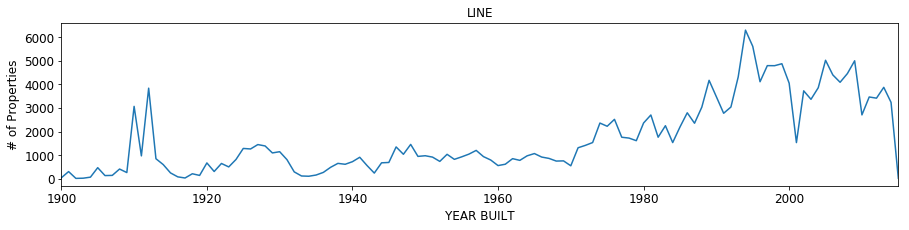

In [408]:
#Question 4. Plot a line chart
#Suppose we want to know: 
#"How many properties were built in each year (from 1990 to 2018)?" 
#Please plot a line chart to answer the question.
t = p.count()['PID']
pp = t.plot(kind='line', x='YEAR_BUILT', y='PID', title ="LINE",figsize=(15,3),legend=False, fontsize=12)
pp.set_xlabel("YEAR BUILT",fontsize=12)
pp.set_ylabel("# of Properties",fontsize=12)

In [409]:
#Findings:
#1) Most buildings were built in 1995 and the lest in 1900. 
#2) Starting from 1918 number of buildings were increasing every year. however it was a big drop in 2000.

In [410]:
#Print the percentage of the rows whose YEAR_BUILT is missing.

In [411]:
len(df) #total data length

205346

In [412]:
nol1 = df['YEAR_BUILT'].isnull().sum() #number of rows that are missing

In [413]:
notnol = df['YEAR_BUILT'].count() #number of rows that are not missing

In [414]:
perc = nol1/len(df) #Print the percentage of the rows whose YEAR_BUILT is missing.

In [415]:
print(perc) #the percentage of the rows whose YEAR_BUILT is missing = 5%

0.0508751083537


In [416]:
#Question 5. Plot a bar chart
#Next, we want to find that, between 1900 and 2018, which years have the most number of properties been built? 
#Plot a bar chart to show the top 20 years.

In [417]:
v = t.to_frame().reset_index()

In [418]:
tt=v.sort_values(by=['PID'],ascending=False)

In [419]:
f20=tt.iloc[0:20] # first 20 rows of dataframe, head(20)

In [420]:
f20.YEAR_BUILT = f20.YEAR_BUILT.astype(int)

Text(0,0.5,'# of Properties')

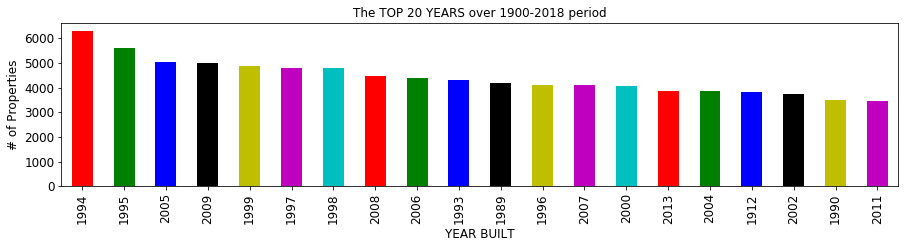

In [421]:
colors = 'rgbkymc'
ax = f20.plot(kind='bar', x='YEAR_BUILT', y='PID', color = colors, title ="The TOP 20 YEARS over 1900-2018 period",figsize=(15,3),legend=False, fontsize=12)
ax.set_xlabel("YEAR BUILT",fontsize=12)
ax.set_ylabel("# of Properties",fontsize=12)

## 

In [422]:
#FINDINGS:
#1) The Most number of properties were built in 1994, arount 6200. Then in in 1995, around 5700. The loswest number were built 
# in 2011 around 4000.
#2) Interesting that after building a lot of properties in 1995 in 10 years in 2005 were built again a lot. 

In [423]:
#Question 6. Plot a histogram
#What's the distribution of the number of properties built between 1990 and 2018? 
#Please plot a histogram to answer this question.

In [424]:
ll=df['YEAR_BUILT'] >= 1900.0
m=df[ll].groupby('YEAR_BUILT')

Text(0.5,0,'# OF Properties')

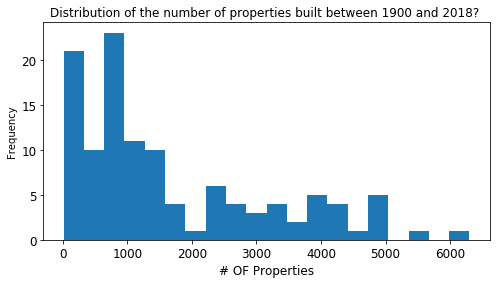

In [425]:
mm = m.count()['PID']
mmm = mm.plot(kind='hist', x='YEAR_BUILT', y='PID', bins = 20,title ="Distribution of the number of properties built between 1900 and 2018? ",figsize=(8,4),legend=False, fontsize=12)
mmm.set_xlabel("# OF Properties",fontsize=12)

In [426]:
#FINDINGS:
#1) The most Frequency of # of properties is for properties in range 0-400 and in range 800-1000 per year.
#2) The Less frequent # of properties is for properties in range 1800 - 2200 and in range 6000-6500 per year. 
# There were no # of properties in ragne 5000-5300 and 5700-6000.

In [427]:
#Question 7. Make a scatter plot
#Suppose we are interested in those years which built more than 2000 properties.
#Make a scatter plot to examine whether there is a relationship between the number of built properties and the year?

In [428]:
j = v[(v.PID >= 2000)]

Text(0,0.5,'YEAR_BUILT')

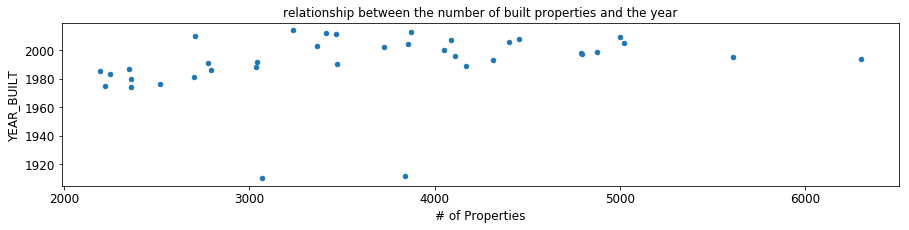

In [429]:
aj = j.plot(kind='scatter', x='PID', y='YEAR_BUILT', title ="relationship between the number of built properties and the year",figsize=(15,3),legend=True, fontsize=12)
aj.set_xlabel("# of Properties",fontsize=12)
aj.set_ylabel("YEAR_BUILT",fontsize=12)

In [430]:
#Findings:
#1) There is no relationship between the # of built properties in range 2000 - 6500 and the year it was built. 
#The scatter plot is almost flat meaning that most of them were built between 1980 and 2000.
#2) An interesting finding that 3100 and 3800 building were built in around 1905 which is very strange.

In [431]:
#Question 8. PDF and CDF
#compare the housing price between this year and last year, i.e., CURRENT_PRICE vs. PREVIOUS_PRICE. 
#You can plot their distributions, and make the comparison. There are two ways to define a distribution: 
#Probabilistic Distribution Function (PDF) and Cumulative Distribution Function (CDF).

#In the following, please make two plots and put them side-by-side.

#In the first plot, use histograms to plot the probabilistic distributions of CURRENT_PRICE and PREVIOUS_PRICE.
#In the second plot, use histograms to plot the cumulative distributions of CURRENT_PRICE and PREVIOUS_PRICE.
#There are a few properties which are way more expensive than the others. 
#For both plots, please exclude those properties by setting xlim = (0, 5Million).

In [432]:
from scipy.stats import norm

In [433]:
# Plot probability density function and of this distribution.
# the pdf() method takes takes in a list x values and returns a list of y's.
#plt.subplot(311) # Creates a 3 row, 1 column grid of plots, and renders the following chart in slot 1.
#df.plot('CURRENT_PRICE', dist.pdf(df.CURRENT_PRICE), 'r', xlim = (0, 5Million), linewidth=2)
#df.title('Probability density function of normal distribution')


In [434]:
#df['CURRENT'] = df.apply(lambda row: row['CURRENT_PRICE']/1000000, axis=1)
#df['PREVIOUS'] = df.apply(lambda row: row['PREVIOUS_PRICE']/1000000, axis=1)

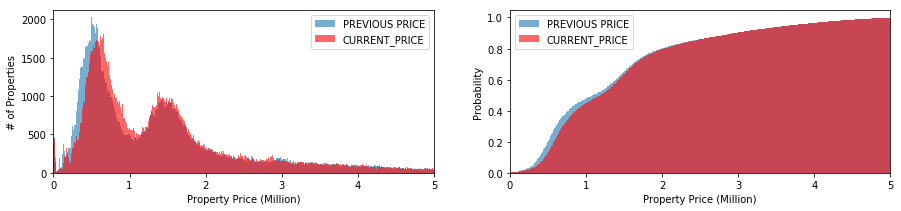

In [435]:
plt.figure(figsize=(15,3))

plt.subplot(1,2,1)
plt.hist(df['PREVIOUS_PRICE'], range = (0,5e6),bins=500, alpha = 0.6, label = 'PREVIOUS PRICE')
plt.hist(df['CURRENT_PRICE'], range = (0,5e6),bins=500, color = 'red', alpha = 0.6, label = 'CURRENT_PRICE')
plt.xlim(0,5e6)
plt.xticks([0,1e6,2e6,3e6,4e6,5e6],[0,1,2,3,4,5])
plt.xlabel("Property Price (Million)")
plt.ylabel("# of Properties")
plt.legend()

plt.subplot(1,2,2)
plt.hist(df['PREVIOUS_PRICE'], normed = 1, cumulative = True, range = (0,5e6),bins=500, alpha = 0.6, label = 'PREVIOUS PRICE')
plt.hist(df['CURRENT_PRICE'],normed = 1, cumulative = True, range = (0,5e6),bins=500, color = 'red', alpha = 0.6, label = 'CURRENT_PRICE')
plt.xlim(0,5e6)
plt.xticks([0,1e6,2e6,3e6,4e6,5e6],[0,1,2,3,4,5])
plt.xlabel("Property Price (Million)")
plt.ylabel("Probability")
plt.legend()

plt.show()


In [436]:
#Findings:
#1) Overall housing price has increased from the previous year.There is a shift of PDF and CDF to the right.   
#2) There were more properties, around 2000, were built in a price range of 0.5M- 0.6M.

In [437]:
#Question 9. Use EDA to answer an interesting question (1)
#we found that the overall housing price has increased, but we do not know which type of property has increased more.

#Now we add another variable LEGAL_TYPE (e.g., STRATA, LAND) to the analysis, 
#and consider three variables (LEGAL_TYPE, CURRENT_PRICE, PREVIOUS_PRICE) in total.

#In the following, please make two plots and put them side-by-side.

#In the first plot, please use histograms to plot the probabilistic distributions of CURRENT_PRICE and PREVIOUS_PRICE 
#for LEGAL_TYPE = "STRATA".
#In the first plot, please use histograms to plot the probabilistic distributions of CURRENT_PRICE and PREVIOUS_PRICE 
#for LEGAL_TYPE = "LAND".

In [438]:
dfSt = df[df.LEGAL_TYPE == 'STRATA']
dfLn = df[df.LEGAL_TYPE == 'LAND']

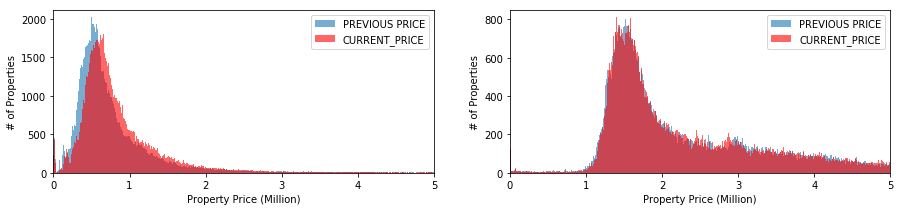

In [439]:
plt.figure(figsize=(15,3))

plt.subplot(1,2,1)
plt.hist(dfSt['PREVIOUS_PRICE'], range = (0,5e6),bins=500, alpha = 0.6, label = 'PREVIOUS PRICE')
plt.hist(dfSt['CURRENT_PRICE'], range = (0,5e6),bins=500, color = 'red', alpha = 0.6, label = 'CURRENT_PRICE')
plt.xlim(0,5e6)
plt.xticks([0,1e6,2e6,3e6,4e6,5e6],[0,1,2,3,4,5])
plt.xlabel("Property Price (Million)")
plt.ylabel("# of Properties")
plt.legend()

plt.subplot(1,2,2)
plt.hist(dfLn['PREVIOUS_PRICE'], range = (0,5e6),bins=500, alpha = 0.6, label = 'PREVIOUS PRICE')
plt.hist(dfLn['CURRENT_PRICE'], range = (0,5e6),bins=500, color = 'red', alpha = 0.6, label = 'CURRENT_PRICE')
plt.xlim(0,5e6)
plt.xticks([0,1e6,2e6,3e6,4e6,5e6],[0,1,2,3,4,5])
plt.xlabel("Property Price (Million)")
plt.ylabel("# of Properties")
plt.legend()

plt.show()

In [440]:
#Findings:
# Overall STRATA properties are more expensive than LAND properties.
#1) For STRATA an overall price has increased from the previous year. 
# The most propersties around 1800 were built with a price in range 0.5M - 0.7M.
#2) For LAND an overall price has not changed.
# The most propersties around 800 were built with a price in range 1.3M - 1.6M.

In [441]:
#Question 10. Use EDA to answer interesting questions (2)
#Although the housing price of the entire Vancouver area is increasing, 
#there might be some areas whose housing price is decreasing. 
#To answer this question, we need to consider another column -- PROPERTY_POSTAL_CODE.

#PROPERTY_POSTAL_CODE (e.g., "V5A 1S6") is a six-character string with a space separating the third and fourth characters. 
#We use the first three characters to represent an area.

#We first filter out the areas which have less than 10 properties. 
#For each of the remaining areas, we calculate the percentage of the properties whose price has decreased compared to the 
#last year. For example, if an area "V5A" has 50 properties, and 30 of them have decreased, then the percentage is 60%.

#Please write code to find the top-10 areas with the highest percentages. Create a bar chart to visualize them.

In [442]:
df['postal_code']=df['PROPERTY_POSTAL_CODE'].apply(lambda x: str(x).split(" ")[0]) #use the first three characters to represent an area.

In [443]:
u = df.groupby('postal_code')
w = u.count()['PID']
ww = w.to_frame().reset_index()
e= ww[ww['PID'] >= 10] #filter out the areas which have less than 10 properties. 

In [444]:
df['price_difference'] = df['CURRENT_PRICE']-df['PREVIOUS_PRICE']

In [445]:
uu = df[df['price_difference']<0]

In [446]:
uu = uu.groupby('postal_code')
rr = uu.count()['PID']
s = rr.to_frame().reset_index()

In [447]:
e= e.merge(s,on='postal_code',how='inner')
e = e[e['postal_code']!='nan']

In [448]:
#the percentage of the properties whose price has decreased compared to the last year
e['percentage'] = e.PID_y/e.PID_x *100
e =e.sort_values('percentage', ascending = False)
e = e.head(10) #top-10 areas with the highest percentages.

Text(0,0.5,'Percentage (%)')

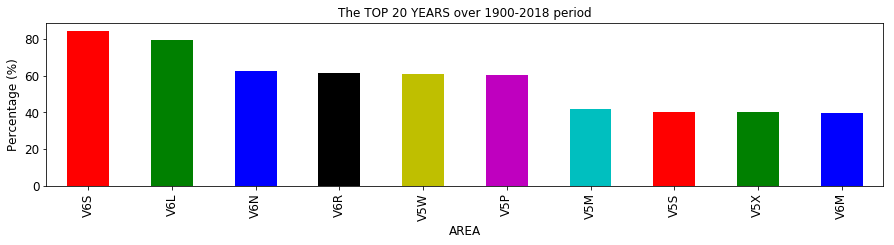

In [449]:
colors = 'rgbkymc'
at = e.plot(kind='bar', x='postal_code', y='percentage', color = colors, title ="The TOP 20 YEARS over 1900-2018 period",figsize=(15,3),legend=False, fontsize=12)
at.set_xlabel("AREA",fontsize=12)
at.set_ylabel("Percentage (%)",fontsize=12)

In [450]:
#FINDINGS:
#1) For Properties with an Area code starting with V65 property price increased more than 80%.
#2) For Properties with an Area code starting with V6M property price increased around 50%. 

In [451]:
#Question 11. Come up with your own question.
#You need to complete the following three tasks.

#Calculate number of different Zone Categories and Show the Fraction of Zone Categories which were built for all period of time.

#Secondly, please write code and Write findings.

In [452]:
nope = df.groupby('ZONE_CATEGORY')
noppe = nope.count()['PID'] #number of different Zone Categories
top = noppe.to_frame().reset_index()

In [453]:
ml=df[lll].groupby('ZONE_CATEGORY')

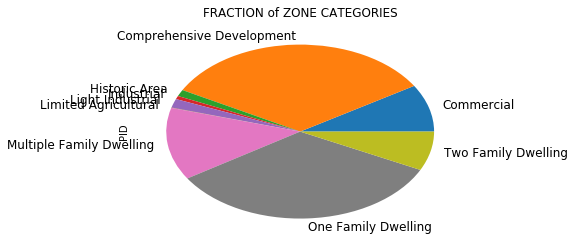

In [454]:
mml = ml.count()['PID']
mmml = mml.plot(kind='pie', title ="FRACTION of ZONE CATEGORIES" ,figsize=(6,4),legend=False, fontsize=12)

In [455]:
#FINDINGS:
#1) The more building were built with ONE Family Dwelling category and Comprehensive Development
#2) The least fraction is Industrial because it's having the smallest fraction.

In [456]:
#Part 2. Bootstrapping

In [457]:
df_sample = pd.read_csv("property_tax_report_sample.csv")

df_sample['CURRENT_PRICE'] = df_sample.apply(lambda x: x['CURRENT_LAND_VALUE']+x['CURRENT_IMPROVEMENT_VALUE'], axis = 1)

df_sample['PREVIOUS_PRICE'] = df_sample.apply(lambda x: x['PREVIOUS_LAND_VALUE']+x['PREVIOUS_IMPROVEMENT_VALUE'], axis = 1)

df_sample = df_sample[df_sample['LEGAL_TYPE'] == 'STRATA']

In [458]:
df_sample['CURRENT'] = df_sample.apply(lambda row: row['CURRENT_PRICE']/1000000, axis=1)
df_sample['PREVIOUS'] = df_sample.apply(lambda row: row['PREVIOUS_PRICE']/1000000, axis=1)


In [459]:
#Task 1. Analysis Result Without Bootstrapping
#Please compute the median of PREVIOUS_PRICE and CURRENT_PRICE, respectively, and compare them in a bar chart.

In [460]:
medianCP = df_sample['CURRENT'].median()
medianPP = df_sample['PREVIOUS'].median()

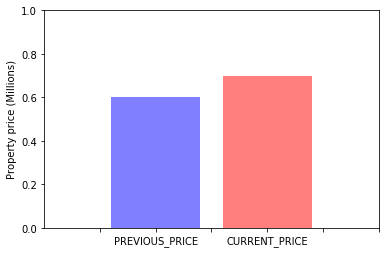

In [461]:
colors = "br"
plt.xlim(0,3)
plt.ylim(0,1)
 
plt.bar([1,2],[medianPP,medianCP], color = colors, alpha=0.5)
plt.xticks([0.5, 1,1.5,2.0, 2.5,3],[" " ,"PREVIOUS_PRICE"," ", "CURRENT_PRICE"," "," "])
plt.ylabel('Property price (Millions)')
 
plt.show()

In [462]:
df_sample.shape

(1187, 33)

In [463]:
#Task 2. Analysis Result With Bootstrap

In [464]:
from pandas.tools.plotting import bootstrap_plot

In [465]:
#bootstrap_plot(df_sample["CURRENT"], size=50, samples=1187, color='grey')
#ax4.set_xlabel("Mean")
df_sample['CURRENT'] = df_sample.apply(lambda row: row['CURRENT_PRICE']/1000000, axis=1)
df_sample['PREVIOUS'] = df_sample.apply(lambda row: row['PREVIOUS_PRICE']/1000000, axis=1)


In [466]:
import numpy as np
import pandas
ts = pandas.Series(df_sample["CURRENT_PRICE"].dropna())

#bootstrap_plot(data, size=50, samples=500, color='grey')

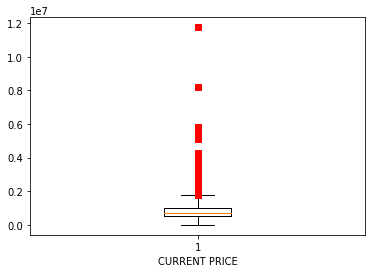

In [467]:
plt.boxplot(ts, 0, 'rs', bootstrap=1000, widths = 0.2)
#plt.legend()
plt.xlabel("CURRENT PRICE")
plt.show()




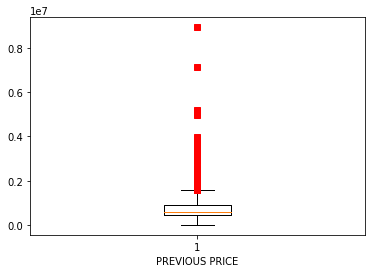

In [472]:
ts = pandas.Series(df_sample["PREVIOUS_PRICE"].dropna())
plt.boxplot(ts, 0, 'rs', bootstrap=1000, widths = 0.2)
#plt.legend()
plt.xlabel("PREVIOUS PRICE")
plt.show()
